<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T2_P2_P3_GD_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sympy import *
import scipy, pylab
import matplotlib.pyplot as plt

In [2]:
#𝐹(𝑥_1,𝑥_2 ) = (𝑥_1−1)^2+(𝑥_2−1)^4; (𝑥_1+1)^2+(𝑥_2+1)^2] con 𝒳=[−3, 3]×[−3, 3] 

In [3]:

class Funcion_P1_F1():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        self.fx = (self.x1-1)**2 + (self.x2-1)**4


In [4]:

class Funcion_P1_F2():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        self.fx = (self.x1+1)**2 + (self.x2+1)**2


In [5]:

class Funcion_P2_F1():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        gamma = 0.7
        self.fx = 0.5 * (( ( 1 + (self.x1 + self.x2)**2 )**0.5 ) + ( ( 1 + (self.x1 - self.x2)**2 )**0.5 ) + self.x1 - self.x2) + gamma * exp(-(self.x1-self.x2)**2)


In [6]:

class Funcion_P2_F2():    
    def __init__(self):
        self.x1 = Symbol('x1')
        self.x2 = Symbol('x2')
        gamma = 0.7
        self.fx = 0.5 * (( ( 1 + (self.x1 + self.x2)**2 )**0.5 ) + ( ( 1 + (self.x1 - self.x2)**2 )**0.5 ) - self.x1 + self.x2) + gamma * exp(-(self.x1-self.x2)**2)


In [7]:
def Eval(func, X):
  f = func.fx.subs([(Symbol('x1'), X[0][0]), (Symbol('x2'), X[1][0])]).doit()
  return f

def Gradient(func):
  d1 = np.array( [[func.diff(Symbol('x1'))], [func.diff(Symbol('x2')) ]] )
  return d1

def Gradient_k(func, K):
  d1 = np.array( [[func.diff(Symbol('x1'))], [func.diff(Symbol('x2')) ]] )
  v1 = d1[0][0].subs([(Symbol('x1'), K[0][0]), (Symbol('x2'), K[1][0])]).doit()
  v2 = d1[1][0].subs([(Symbol('x1'), K[0][0]), (Symbol('x2'), K[1][0])]).doit()      
  return np.array( [[v1], [v2 ]] )

def pk(func, X):
  direct = -1 * Gradient(func)
  v1 = direct[0][0].subs([(Symbol('x1'), X[0][0]), (Symbol('x2'), X[1][0])]).doit()
  v2 = direct[1][0].subs([(Symbol('x1'), X[0][0]), (Symbol('x2'), X[1][0])]).doit()      
  return np.array( [[v1], [v2 ]] )
  

#Condiciones de Wolfe
def StepSize(func, X, alpha, ro, c):
  counter=0
  pka = pk(func, X)
  g = Gradient_k(func, X)
  gT = np.transpose(g)

  while True:
    Xd = X + alpha * pka
    fd = Eval(func, Xd)
    fi = Eval(func, X) + c *alpha * np.matmul(gT, pka).item()
    counter += 1
        
    if fd<fi or counter>100:
      return alpha
    else:
      alpha = ro * alpha


In [8]:
#crear pesos
w1 = [i/100 for i in range(0, 101)]
w2=[]

for i in range(len(w1)):
  w2.append(round(1-w1[i],2))



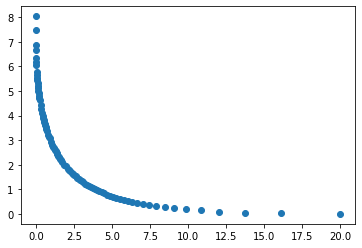

In [9]:

rango_min = -3
rango_max = 3

func_1 = Funcion_P1_F1()
func_2 = Funcion_P1_F2()

graph_1=[]
graph_2=[]


for iter in range(len(w1)):
  myFunc = (w1[iter]*func_1.fx)+(w2[iter]*func_2.fx)


  # X inicial aleatorio
  r1 = random.uniform(rango_min, rango_max)
  r2 = random.uniform(rango_min, rango_max)
  xk = np.array([[r1], [r2]])

  #parametros iniciales
  alpha = 0.1
  ro = 0.1
  c = 0.0001

  for j in range(50):
    pka = pk(myFunc, xk)
    #alpha = StepSize(myFunc, xk, alpha, ro, c)    
    xk = xk + (alpha * pka)

  ev1 = Eval(func_1, xk)
  ev2 = Eval(func_2, xk)
    
  graph_1.append(ev1)
  graph_2.append(ev2)

plt.scatter(graph_1, graph_2)
plt.show()

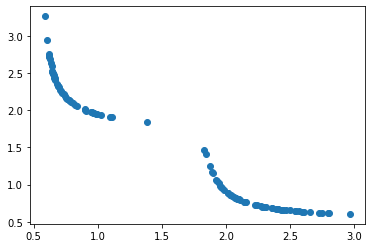

In [10]:

rango_min = -2
rango_max = 2

func_1 = Funcion_P2_F1()
func_2 = Funcion_P2_F2()

graph_1=[]
graph_2=[]


for iter in range(len(w1)):
  myFunc = (w1[iter]*func_1.fx)+(w2[iter]*func_2.fx)


  # X inicial aleatorio
  r1 = random.uniform(rango_min, rango_max)
  r2 = random.uniform(rango_min, rango_max)
  xk = np.array([[r1], [r2]])

  #parametros iniciales
  alpha = 0.1
  ro = 0.1
  c = 0.0001

  for j in range(50):
    pka = pk(myFunc, xk)
    #alpha = StepSize(myFunc, xk, alpha, ro, c)    
    xk = xk + (alpha * pka)

  ev1 = Eval(func_1, xk)
  ev2 = Eval(func_2, xk)
    
  graph_1.append(ev1)
  graph_2.append(ev2)

plt.scatter(graph_1, graph_2)
plt.show()